# Etude de l'enquête ETIC du 2nd degré

Dans cette analyse, notre objectif était d'étudier cette enquête pour pouvoir ensuite donner un score ETIC à chaque établissement pour ensuite pouvoir faire des études de ce score avec le label numérique par exemple. C'est la source de données que nous avons trouvées assez complètes qui nous donne les informations sur les moyens numériques dans ces établissements. Cette étude porte sur les lycées et les collèges.

Nous voulons mettre en place une formule qui permet de donner un score à chaque établissement en fonction des réponses fournies à l'enquéte. 
Seul problème, c'est qu'on a 80 colonnes dans cette enquête. Il est difficile donc d'utiliser une méthode pour analyser toutes ces colonnes.

Dans un premier temps, nous avons mis en place une formule dans laquelle nous avions gardé les colonnes jugés intéressantes du point de vue du numérique. Mais nous ne sommes rapidement rendu compte que rien ne justifiait nos choix et peut-être que nous avions raté des informations importantes. Nous avons aussi réalisé l'importance de mettre en place des poids car si cela se trouve il y a des colonnes qui sont fortement liés et donc ne devraient pas influencer énormément le score car une implique l'autre.

Pour pouvoir accorder des poids, nous avions choisi de faire une ACM avec les colonnes existantes. Chose qui est presque impossible à interpréter car nous avons 80 variables avec chacune au moins deux modalités. Nous nous étions donc lancé dans cela pour la maintenance, cela a été un échec et donc nous avons décidé de supprimer notre travail et de repartir à zéro.


Nous avons donc décidé de réduire le nombre de colonnes en faisant plusieurs analyses en parallèle qui nous ont permis de réduire le nombre des colonnes.
Les analyses sont les suivantes :
- analyse sur la maintenance qui nous a permis de réduire 6 colonnes en une seule
- analyse sur l'accés Web : de 7 colonnes à une seule
- analyse sur les services numériques : de 9 colonnes à 1 colonne
- analyse sur les ressources numériques mises à disposition :  de 7 colonnes à 1 colonne
- analyse sur les terminaux : de 15 colonnes à 1 colonne
- analyse sur le bon usage de Internet (Charte Web) : de 9 colonnes à 1 seule colonne

Ces études en détails nous ont permis de réduire le nombre de colonnes de 47 colonnes.
Vous pouvez trouver ces études dans les différents notebooks pour plus de détails.

Ici, on récupére le résultat des analyses sans expliquer les résultats.

Il ne nous reste qu'à supprimer les colonnes que nous jugeons pas intéressantes et ensuite procéder à une ACM pour pouvoir analyser et accorder à chaque colonne un poids. De cette façon, nous pourrons établir une formule pour le poids et accorder un score ETIC à chaque établissement.

Pour finir, nous allons chercher à voir si il existe un lien entre le score ETIC calculé et le label numérique


### *Import des librairies*



In [1]:
import pandas as pd
import plotly.express as px
import prince as pc

# import image module
from IPython.display import Image
import kaleido
import io
from PIL import Image as ImagePIL

## *ETL*
### Import des fichiers

In [2]:
#import du fichier principal
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';', index_col=0)

#On garde les données les plus récentes pour éviter des duplicats
df = df.loc[df['Millesime'] == 2019]

# import des fichiers de données des analyses
df_charte = pd.read_csv('../data/analyses/charte_num.csv', sep=';', index_col=0)
df_acc_web = pd.read_csv('../data/analyses/acces_web.csv', sep=';', index_col=0)
df_termin = pd.read_csv('../data/analyses/terminaux_num.csv', sep=';', index_col=0)
df_services = pd.read_csv('../data/analyses/services_num.csv', sep=';', index_col=0)
df_acc_ressources = pd.read_csv('../data/analyses/acces_ressources.csv', sep=';', index_col=0)
df_maint = pd.read_csv('../data/analyses/maintenance.csv', sep=';', index_col=0)

### Transformation des données

On va principalement supprimer les colonnes inutiles dans le dataframe principal.

In [3]:
df.columns

Index(['Millesime', 'Code_nature', 'nature_uai', 'typ_etab', 'Academie',
       'Departement', 'NbEleve', 'NbEnseignant', 'SiEtabCentreRessource',
       'SiProjetNumEcole', 'SiEntDisponible', 'SiProjEtabIntegreENT',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne',
       'NbRessourceEdit', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', '

In [4]:
df.drop(columns=['Code_nature', 'nature_uai',
       'Maint_PersCollect', 'Maint_PrestaExt', 'Maint_PersonnelEducNatHsEtab',
       'Maint_PersonnelEtab', 'Maint_AutreNeSaitPas', 'Maint_Personne', 'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu',
       'TpRess_Bdd', 'TpRess_LogiOutils', 'TpRess_OuvRef',
       'TpRess_ResEntrainement', 'TpRess_Autres', 'TpRess_aucune',
       'ServInt_NoteElev', 'ServInt_AbsElev', 'ServInt_EdtElevCls',
       'ServInt_CahierTxt', 'ServInt_DocRessPeda', 'ServInt_AgdActuEtab',
       'ServInt_PlatApp', 'ServInt_Autres', 'ServInt_aucun', 'NbTerminaux',
       'NbTablette', 'NbTablettePC', 'NbMicroMoins5', 'NbMicroPortable',
       'NbPortAffEl', 'NbPortAffEns', 'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI',
       'propClassesAvecTBI', 'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx',
       'NbImpr3D', 'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet',
       'SiPareFeuEtab', 'SiOuifiltrageWeb', 'ControlePosteriori',
       'SiCharteUsageWeb', 'Diffch_AnnexeeRI',
       'Diffch_DossierRentreeEnseignants', 'Diffch_CRConseilAdmin',
       'Diffch_DiffusionParents', 'Diffch_Autres', 'AccesParentCharte',
       'ElvAuthentif', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre'], inplace=True)

In [5]:
print(df.columns)
df.shape

Index(['Millesime', 'typ_etab', 'Academie', 'Departement', 'NbEleve',
       'NbEnseignant', 'SiEtabCentreRessource', 'SiProjetNumEcole',
       'SiEntDisponible', 'SiProjEtabIntegreENT', 'NbRessourceEdit',
       'PostesInfoElvHorsCours', 'SiVisioConferenc', 'Code_region',
       'Libelle_region'],
      dtype='object')


(442, 15)

In [6]:
df.head()

,Millesime,typ_etab,Academie,Departement,NbEleve,NbEnseignant,SiEtabCentreRessource,SiProjetNumEcole,SiEntDisponible,SiProjEtabIntegreENT,NbRessourceEdit,PostesInfoElvHorsCours,SiVisioConferenc,Code_region,Libelle_region
Code_UAI,,,,,,,,,,,,,,,
0810016C,2019,P,TOULOUSE,TARN,311.0,38.0,non,oui,NaN,oui,10a19,5.0,non,76,Occitanie
0810026N,2019,C,TOULOUSE,TARN,379.0,27.0,non,oui,NaN,oui,NaN,10.0,non,76,Occitanie
0810041E,2019,C,TOULOUSE,TARN,683.0,44.0,non,oui,NaN,oui,5a9,15.0,non,76,Occitanie
0810124V,2019,C,TOULOUSE,TARN,632.0,38.0,oui,oui,NaN,oui,5a9,15.0,non,76,Occitanie
0810125W,2019,C,TOULOUSE,TARN,814.0,65.0,non,oui,NaN,oui,1a4,19.0,non,76,Occitanie


On cherche pour chaque colonne le nombre de `NaN`. Si ce nombre est trop important, il vaut mieux supprimer la colonne de notre analyse pour avoir un maximum d'établissements pour lesquels nous pourrons établir un score.

In [7]:
for col in df.columns:
    print(col, df[col].isna().sum())

Millesime 0
typ_etab 0
Academie 0
Departement 0
NbEleve 0
NbEnseignant 0
SiEtabCentreRessource 2
SiProjetNumEcole 2
SiEntDisponible 442
SiProjEtabIntegreENT 3
NbRessourceEdit 41
PostesInfoElvHorsCours 18
SiVisioConferenc 17
Code_region 0
Libelle_region 0


On voit qu'on a 446 valeurs `NaN` sur 917 valeurs pour la colonne `SiEntDisponible`, ce qui est énorme. On ne pourra pas utiliser cette colonne pour notre étude, du coup on va la supprimer. On voit également que pour la colonne `NbRessourceEdit` nous avons 93 valeurs `NaN`, ce qui donne environ 10 % des établissements. On va supprimer également cette colonne. On fait le choix de garder les colonnes `SiVisioConferenc` et `PostesInfoElvHorsCours` car le nombre de valeurs `NaN` vaut environ 38, soit 4% approximativement. Ces colonnes sont importantes car elles donnent beaucoup d'information.

In [8]:
df.drop(columns=['SiEntDisponible', 'NbRessourceEdit'], inplace=True)

df.dropna(inplace=True)

print(df.columns)
df.shape

Index(['Millesime', 'typ_etab', 'Academie', 'Departement', 'NbEleve',
       'NbEnseignant', 'SiEtabCentreRessource', 'SiProjetNumEcole',
       'SiProjEtabIntegreENT', 'PostesInfoElvHorsCours', 'SiVisioConferenc',
       'Code_region', 'Libelle_region'],
      dtype='object')


(411, 13)

Nous avons perdu 65 établissements, mais cela était nécessaire car sinon on ne pourra faire nos analyses.

On va maintenant garder seulement les colonnes qui vont nous servir pour pouvoir faire l'ACM et déterminer les liaisons existantes entre nos différentes variables et corriger la formule du score ETIC.

In [9]:
df_analyse = df.copy()

df_analyse.drop(columns=['Millesime', 'typ_etab', 'Academie', 'Departement', 'Code_region', 'Libelle_region'], inplace=True)

df_analyse.columns

Index(['NbEleve', 'NbEnseignant', 'SiEtabCentreRessource', 'SiProjetNumEcole',
       'SiProjEtabIntegreENT', 'PostesInfoElvHorsCours', 'SiVisioConferenc'],
      dtype='object')

On va renommer maintenant les colonnes

In [10]:
for col in df_analyse.columns:
    df_analyse.rename(columns={col : col.lower()}, inplace=True)

df_analyse.columns

Index(['nbeleve', 'nbenseignant', 'sietabcentreressource', 'siprojetnumecole',
       'siprojetabintegreent', 'postesinfoelvhorscours', 'sivisioconferenc'],
      dtype='object')

On peut maintenant joindre à nos autres données pour procéder aux analyses.

In [11]:
join = df_analyse.join(df_charte, how='inner')
join = join.join(df_acc_web, how='inner')
join = join.join(df_termin, how='inner')
join = join.join(df_services, how='inner')
join = join.join(df_acc_ressources, how='inner')
join = join.join(df_maint, how='inner')

join.columns

Index(['nbeleve', 'nbenseignant', 'sietabcentreressource', 'siprojetnumecole',
       'siprojetabintegreent', 'postesinfoelvhorscours', 'sivisioconferenc',
       'charte_num', 'acces_web', 'terminaux_qualité', 'nb_terminaux',
       'services_num', 'acces_ressources', 'maintenance'],
      dtype='object')

In [12]:
for col in join.columns:
    print(col, join[col].isna().sum())

join.shape

nbeleve 0
nbenseignant 0
sietabcentreressource 0
siprojetnumecole 0
siprojetabintegreent 0
postesinfoelvhorscours 0
sivisioconferenc 0
charte_num 0
acces_web 0
terminaux_qualité 0
nb_terminaux 0
services_num 0
acces_ressources 0
maintenance 0


(193, 14)

In [13]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0810016C to 0820713E
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nbeleve                 193 non-null    float64
 1   nbenseignant            193 non-null    float64
 2   sietabcentreressource   193 non-null    object 
 3   siprojetnumecole        193 non-null    object 
 4   siprojetabintegreent    193 non-null    object 
 5   postesinfoelvhorscours  193 non-null    float64
 6   sivisioconferenc        193 non-null    object 
 7   charte_num              193 non-null    object 
 8   acces_web               193 non-null    object 
 9   terminaux_qualité       193 non-null    object 
 10  nb_terminaux            193 non-null    float64
 11  services_num            193 non-null    object 
 12  acces_ressources        193 non-null    object 
 13  maintenance             193 non-null    object 
dtypes: float64(4), object(10)
memory us

On voit qu'ici nous avons 2 colonnes qui contiennent des nombres (float), nous allons donc ne pas les prendre en compte ici dans notre ACM.

In [14]:
join_acm = join.drop(columns=["postesinfoelvhorscours", "nb_terminaux", "nbeleve", "nbenseignant"])

### *ACM*

Avant de procéder à l'ACM, voici les résultats que nous avions eu précedemment avec une ACM de toutes les colonnes ou que sur la maintenance qui étaient dur à interprèter et qui ne nous ont pas aidé à interpréter les résultats.

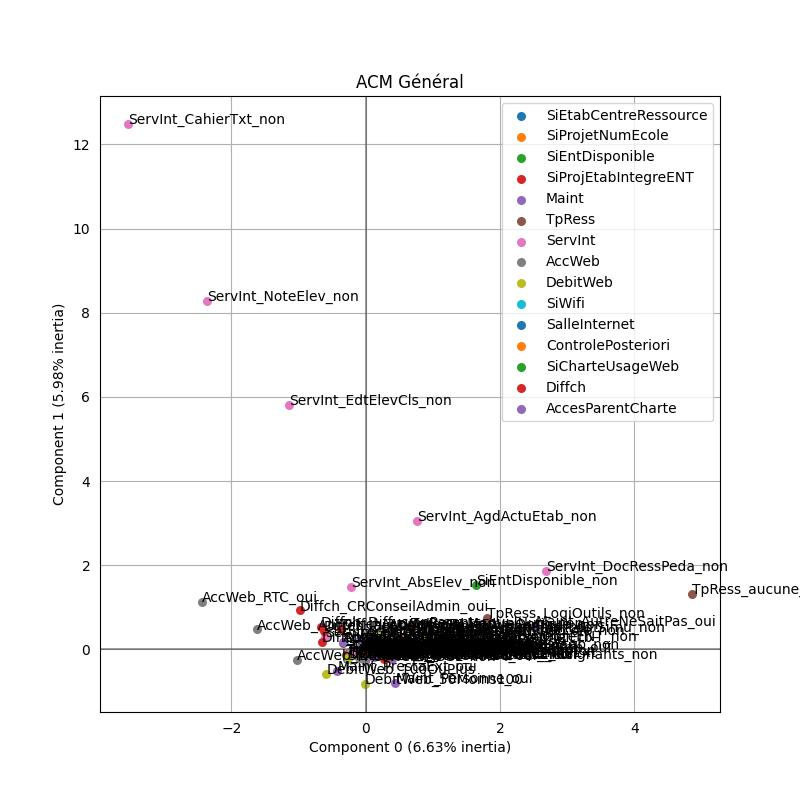

In [15]:
Image(filename='../images/acm_general_essai.jpg', width=400, height=400)

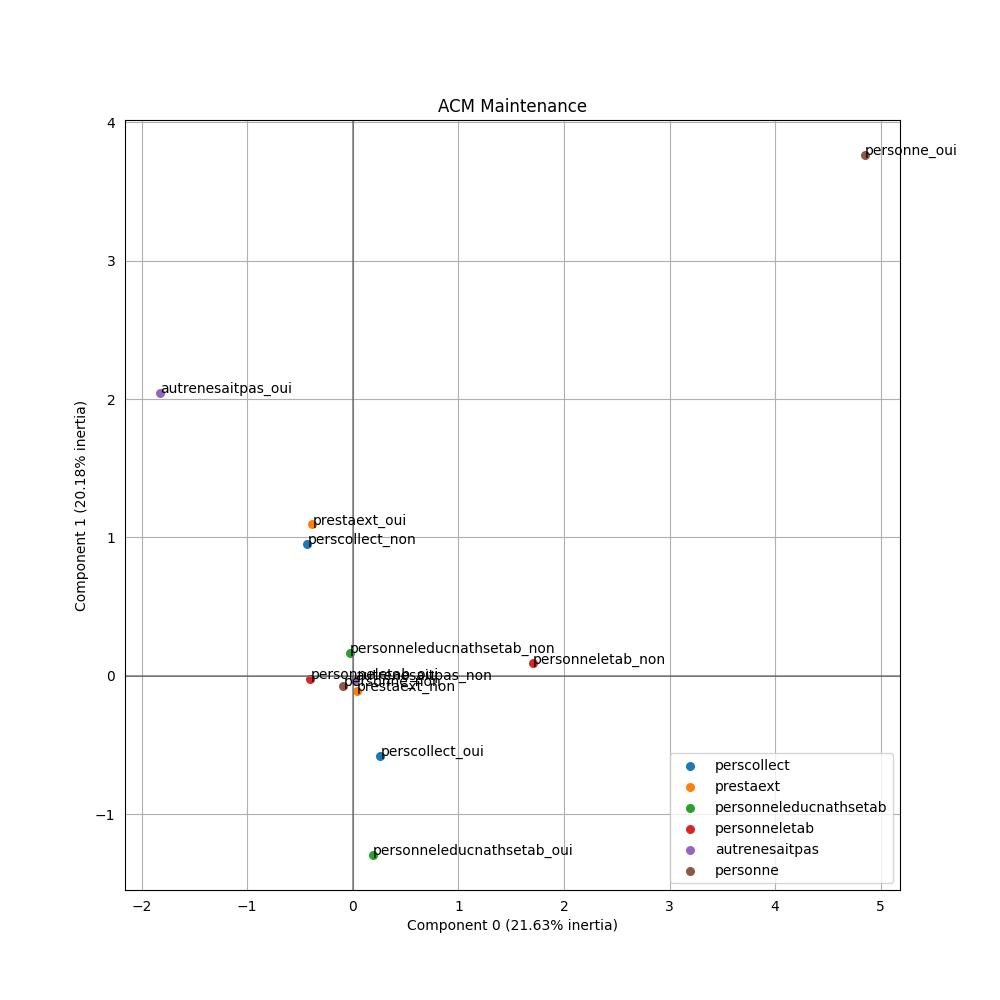

In [16]:
Image(filename='../images/acm_maintenance.jpg', width=400, height=400)

Les résultats ne sont pas interprétables comme vous pouvez le voir. Nous avons donc décidé de partir sur de la classification non supervisée pour réduire ce nombre de colonnes.

On va pouvoir maintenant procéder à l'ACM pour trouver des liens entre toutes ces variables. On va utiliser la bibliothèque ***Prince***

In [17]:
mca = pc.MCA(
    n_components=2, 
    n_iter=3, 
    copy=True, 
    check_input=True, 
    engine='auto', 
    random_state=42
)

mca = mca.fit(join_acm)

Text(0.5, 1.0, 'MCA')

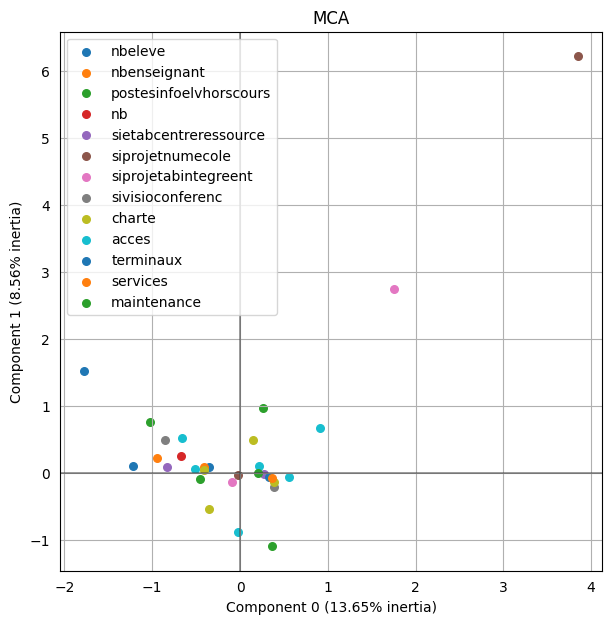

In [18]:
ax = mca.plot_coordinates(
    X=join,
    ax=None,
    figsize=(7, 7),
    show_row_points=False,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

ax.set_title('MCA')

Il est difficile d'interpréter cette ACM car premièrement la variance totale expliquée ici n'est que de 22.21%. Cela est trop bas pour être fiablement interprété. Nous allons essayer de passer sur R qui permet d'avoir des graphes supplémentaires pour plus de détails malgré que l'information ne sera pas plus fiable car nous aurons environ la même variance. Nous allons donc écrire nos résultats dans un fichier csv qui va être utilisé.

In [19]:
join_acm.to_csv("../data/analyses/analyse_score_etic.csv",sep=";", index=False)

#### Analyses sur R

Voici le code :

Et voici les résultats de notre analyse :

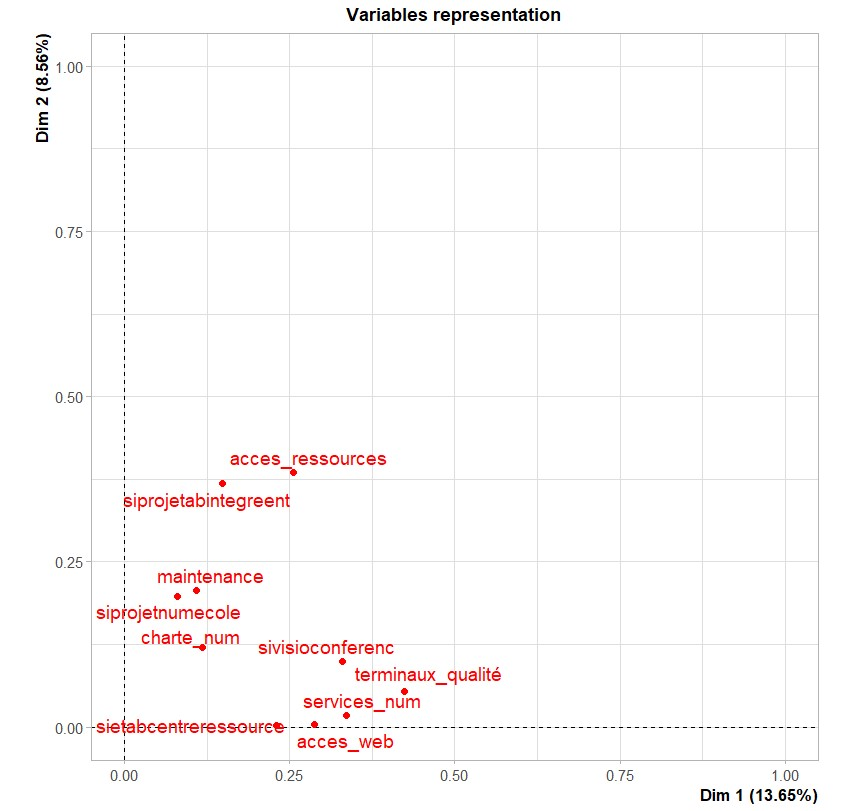

In [20]:
Image(filename='../images/acm_etic2_variables.jpg', width=500, height=500)

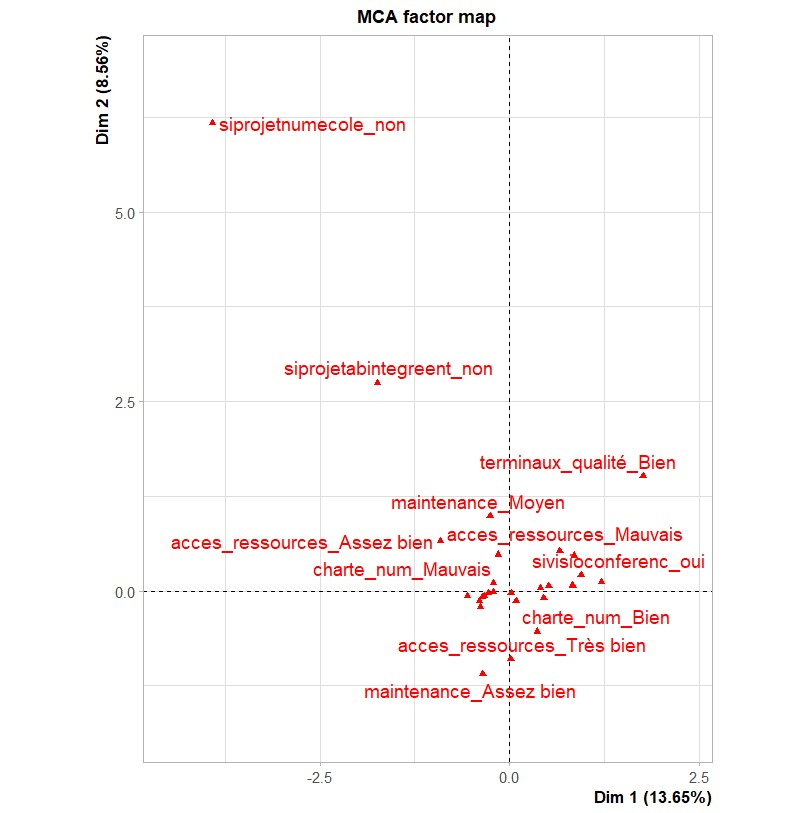

In [21]:
Image(filename='../images/acm_etic2_modalités.jpg', width=500, height=500)


On voit qu'ici aussi l'ACM est trés difficile à interpréter, la variance totale expliquée est très petite ici aussi, identique à celle qu'on a eu avec la bibliothèque `prince`. On ne peut pas réellement pas interpréter donc et on ne peut pas réellement se baser sur cette ACM pour accorder des poids. Ce n'est pas forcément les résultats attendus mais on n'a pas d'autres solutions. Cela serait une erreur de prendre en compte les résultats de cette ACM pour accorder des importances à chaque variable dans la formule du score ETIC.

Nous allons mettre en place la formule pour chaque établissement sans pouvoir réellement accorder une valeur de poids.

### *Score ETIC*

Nous pouvons ici procéder au calcul du score ETIC sur toutes les colonnes qu'il nous reste. Nous allons rappeler les colonnes existantes :

In [22]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0810016C to 0820713E
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nbeleve                 193 non-null    float64
 1   nbenseignant            193 non-null    float64
 2   sietabcentreressource   193 non-null    object 
 3   siprojetnumecole        193 non-null    object 
 4   siprojetabintegreent    193 non-null    object 
 5   postesinfoelvhorscours  193 non-null    float64
 6   sivisioconferenc        193 non-null    object 
 7   charte_num              193 non-null    object 
 8   acces_web               193 non-null    object 
 9   terminaux_qualité       193 non-null    object 
 10  nb_terminaux            193 non-null    float64
 11  services_num            193 non-null    object 
 12  acces_ressources        193 non-null    object 
 13  maintenance             193 non-null    object 
dtypes: float64(4), object(10)
memory us

On voit que le colonne `nbenseignant` ne va pas trop nous servir ici car on s'intéresse au numérique mis à disposition pour les élèves. Nous pouvons donc supprimer cette colonne. La colonne `sietabcentreressource` n'est pas très utile car elle nous informe seulement si des personnes extérieures à l'établissement utilise le matériel numérique. Elle n'impacte en aucun cas la qualité du numérique.

Il reste donc 12 colonnes. La colonne `nbeleve` va être utilisé pour faire des ratios avec `nb_terminaux` et `postesinfoelvhorscours`. Le score maximal va être de 100 avec des poids accordés en fonction de l'importance d'une colonne.

On va explorer chaque colonne et voir le nombre de valeurs possibles pour chaque colonne.

In [23]:
join.drop(['nbenseignant', 'sietabcentreressource'], axis=1, inplace=True)

In [24]:
for col in join.columns:
    if(join[col].dtype == 'object'):
        print(col, join[col].unique())


siprojetnumecole ['oui' 'non']
siprojetabintegreent ['oui' 'non']
sivisioconferenc ['non' 'oui']
charte_num ['Mauvais' 'Moyen' 'Bien' 'Très bien']
acces_web ['Moyen' 'Bon']
terminaux_qualité ['Mauvais' 'Bien' 'Moyen']
services_num ['Bien' 'Trés bien']
acces_ressources ['Bien' 'Assez bien' 'Mauvais' 'Très bien']
maintenance ['Bien' 'Assez bien' 'Moyen' 'Trés bien']


Dans notre formule, nous avons choisi d'accorder une grande importance à l'``accés web``, si une école a un bon accés web elle va avoir un meilleur succés. Comme il n'existe pas de valeur "Mauvais" pour l'accés web, une école avec un bon accés sera mieux notée.

On va classer les colonnes par ordre de priorité.
1. `acces_web`
2. `siprojnumecole`
3. Le ratio `nb_terminaux` et `nbeleve`
4. `terminaux_qualité`
5. Le ratio `postesinfoelvhorscours` et `nbeleve`
6. `charte_num`
7. `siprojetabintegreent`
8. `maintenance`
9. `services_num`
10. `acces_ressources`
11. `sivisioconferenc`

On va accorder un petit poids pour la dernière colonne. Les autres ont toutes environ le même poids.

In [25]:
def score(row):
    score = 0
    score += 15 * row.nb_terminaux / row.nbeleve
    score += 10 * row.postesinfoelvhorscours / row.nbeleve


    if(row.acces_web.lower() == 'bon'):
        score += 20


    if(row.siprojetnumecole.lower() == 'oui'):
        score += 10


    if(row.terminaux_qualité.lower() == 'bien'):
        score += 10
    elif(row.terminaux_qualité.lower() == 'moyen'):
        score += 6


    if(row.charte_num.lower() == 'très bien'):
        score += 8
    elif(row.charte_num.lower() == 'bien'):
        score += 5
    elif(row.charte_num.lower() == 'moyen'):    
        score += 2


    if(row.siprojetabintegreent.lower() == 'oui'):
        score += 6


    if(row.maintenance.lower() == 'très bien'):
        score += 5
    elif(row.maintenance.lower() == 'bien'):
        score += 3
    elif(row.maintenance.lower() == 'assez bien'):
        score += 1
    elif(row.maintenance.lower() == 'moyen'):
        score += 0


    if(row.services_num.lower() == 'très bien'):
        score += 3
    elif(row.services_num.lower() == 'bien'):
        score += 2


    if(row.acces_ressources.lower() == 'très bien'):
        score += 2
    elif(row.acces_ressources.lower() == 'bien'):
        score += 1
    elif(row.acces_ressources.lower() == 'assez bien'):
        score += 0
    elif(row.acces_ressources.lower() == 'mauvais'):
        score -= 1.5


    if(row.sivisioconferenc.lower() == 'oui'):
        score += 1

    return 100 *score / 90


Maintenant que nous avons défini la fonction du score, nous pouvons maintenant calculer le score pour chaque établissement.

In [26]:
join['score_ETIC'] = join.apply(score, axis=1)

In [27]:
join.score_ETIC

Code_UAI
0810016C    40.700250
0810125W    50.913186
0811144D    57.309711
0090019X    74.475524
0090055L    54.718772
              ...    
0820004J    71.921922
0820011S    45.070175
0820067C    58.469089
0820684Y    35.965966
0820713E    29.958463
Name: score_ETIC, Length: 193, dtype: float64

On va observer les résultats de ce calcul de score et voir la répartition des valeurs. Est-ce qu'on a une bonne homogénéité ? Est-ce que les individus sont assez proches ?

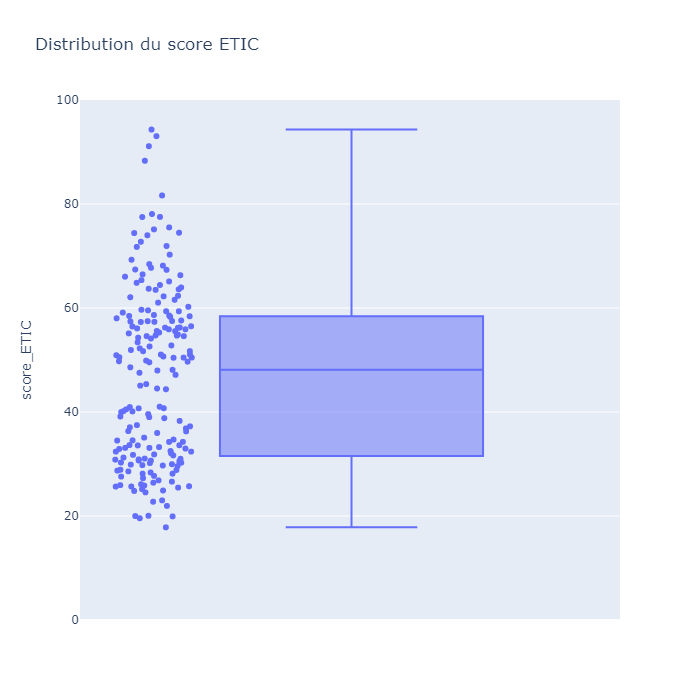

In [28]:
fig = px.box(join, y="score_ETIC", range_y=[0, 100], title="Distribution du score ETIC", points="all", height=700, width=700)
Image(fig.to_image(format="png", width=700, height=700))
#fig.show()

### *Anova*

Maintenant que nous avons calculé le score ETIC pour chaque établissement, nous voulons voir si il existe une influence du score ETIC sur le label numérique. Pour cela nous allons procéder à une ANOVA. L'ANOVA montre l'influence d'un facteur (qui est une variable qualitative sur une variable quantitative), ici le label numérique est une variable qualitative et le score ETIC est une variable quantitative. Or, nous voulons montre l'effet dans l'autre sens. Mais ceci n'est pas un soucis étant donné que le lien entre des variables en ANOVA est réciproque car les variables indépendantes et dépendantes sont liées entre elles de manière réciproque. Une variable indépendante peut affecter une variable dépendante, et vice-versa. Ainsi on pourra tout autant conclure sur l'effet du score ETIC sur la labélisation.


Nous allons d'abord importer les établissements labelisées (lycées et collèges).

In [29]:
df_label_lycee = pd.read_csv("../data/lycee/csv/fr-en-occitanie-label-numerique-lycee.csv", sep=";")
df_label_college = pd.read_csv("../data/lycee-college/fr-en-occitanie-label-numerique-college.csv", sep=";")

On va joindre ces deux jeux de données pour pouvoir ensuite les joindre aux données qu'on possède sur le score ETIC

In [30]:
df_label_lycee.rename(columns={'Niveau de Label' : 'Label'}, inplace=True)
df_label = pd.concat([df_label_lycee, df_label_college], axis=0)

In [31]:
df_label.head()

,Année,RNE,Nom établissement,Localité,Département,Label,Position
0,2018,0810003N,Lycée professionnel Toulouse Lautrec,Albi,81,1,"43.925946863, 2.13937959645"
1,2019,0810003N,Lycée professionnel Toulouse Lautrec,Albi,81,1,"43.925946863, 2.13937959645"
2,2021,0810005R,Lycée d'enseignement général Bellevue,Albi,81,1,"43.9191566269, 2.16069961044"
3,2017,0650001Y,Lycée climatique Climatique René Billères,Argelès-Gazost,65,1,"43.002631819, -0.0938703120221"
4,2021,0650001Y,Lycée climatique Climatique René Billères,Argelès-Gazost,65,3,"43.002631819, -0.0938703120221"


In [32]:
df_label.sort_values(by=['RNE', 'Année'], inplace=True)
df_label.drop_duplicates(subset=['RNE'], keep='last', inplace=True)

In [33]:
df_label.head()

,Année,RNE,Nom établissement,Localité,Département,Label,Position
38,2021,0090002D,Lycée d'enseignement général et technologique ...,Foix,9,1,"42.9619671209, 1.6049297132"
472,2021,0090003E,Lycée professionnel Jean Durroux,Ferrières-sur-Ariège,9,1,"42.9490109341, 1.61791016016"
248,2021,0090006H,Lycée professionnel Joseph Marie Jacquard,Lavelanet,9,1,"42.9210527456, 1.84102035978"
653,2021,0090013R,Lycée polyvalent Mirepoix,Mirepoix,9,1,"43.0858968979, 1.8827606137"
530,2021,0090015T,Lycée polyvalent Pyrène,Pamiers,9,1,"43.1149360138, 1.60903977104"


In [34]:
for col in df_label.columns:
    df_label.rename(columns={col : col.replace(' ', '_').replace('é', 'e').lower()}, inplace=True)

df_label.columns

Index(['annee', 'rne', 'nom_etablissement', 'localite', 'departement', 'label',
       'position'],
      dtype='object')

In [35]:
df_label.set_index('rne', inplace=True)

In [36]:
df_label.head()

,annee,nom_etablissement,localite,departement,label,position
rne,,,,,,
0090002D,2021,Lycée d'enseignement général et technologique ...,Foix,9,1,"42.9619671209, 1.6049297132"
0090003E,2021,Lycée professionnel Jean Durroux,Ferrières-sur-Ariège,9,1,"42.9490109341, 1.61791016016"
0090006H,2021,Lycée professionnel Joseph Marie Jacquard,Lavelanet,9,1,"42.9210527456, 1.84102035978"
0090013R,2021,Lycée polyvalent Mirepoix,Mirepoix,9,1,"43.0858968979, 1.8827606137"
0090015T,2021,Lycée polyvalent Pyrène,Pamiers,9,1,"43.1149360138, 1.60903977104"


In [37]:
score_ETIC = pd.DataFrame(join['score_ETIC'])

join_anova = score_ETIC.join(df_label["label"], how='left')

join_anova.head()

,score_ETIC,label
Code_UAI,,
0810016C,40.700250,1.0
0810125W,50.913186,NaN
0811144D,57.309711,1.0
0090019X,74.475524,1.0
0090055L,54.718772,NaN


In [38]:
print(join_anova.label.isna().sum())
join_anova.shape

75


(193, 2)

Nous avons donc pu récupérer 118 établissements qui ont répondu à cette enquête et qui sont labelisés. On va supprimer les lignes pour lesquelles on a pas de label car ce sont des écoles qui ne sont pas labelisées.

In [39]:
join_anova.dropna(inplace=True)

Nous pouvons maintenant passer à l'ANOVA mais d'abord il faut importer les bibliothèques nécessaires.

In [40]:
# Import des bibliothèques pour l'anova
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats


-------------

_Nous souhaitons répondre à la question suivante : y'a t'il un effet de la labélisation sur le score ETIC ?_

Pour cela on pose les hypothèses suivantes :
- **H0** : _La labélisation d'un établissement (lycée ou collège) n'a pas d'effet sur le score ETIC_
- **H1** : _La labélisation d'un établissement a un effet sur le score ETIC_

In [41]:
lm = sfa.ols('score_ETIC ~ C(label)', data=join_anova).fit()
anova = sa.stats.anova_lm(lm)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(label),2.0,5432.928155,2716.464077,9.334201,0.000175
Residual,115.0,33467.608126,291.022679,NaN,NaN


#### Analyse de l'anova
P_value < alpha (0,05), donc on rejette H0 et on conclut d'une manière significative un effet du label numérique sur le score ETIC

#### Test de Tukey
Ce test permet de préciser quelles modalités de la variable qualitative label a provoqué ce rejet

In [42]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=join_anova['score_ETIC'],
                          groups=join_anova['label'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   1.0    2.0 -15.9631 0.0001 -24.8635 -7.0628   True
   1.0    3.0  -3.6351 0.6147  -12.794  5.5239  False
   2.0    3.0   12.328  0.012   2.2689 22.3872   True
-----------------------------------------------------


#### Analyse de test de tukey
Le test de tukey est utilisé pour comparer les moyennes de plusieurs groupes. Le test est utilisé pour déterminer s'il existe des différences significatives entre les moyennes de différents groupes. L'output montre les résultats du test pour chaque comparaison à paires de groupes. Les colonnes de l'output incluent:

- group1 et group2: les groupes étant comparés
- meandiff: la différence des moyennes entre les deux groupes
- p-adj: la valeur p ajustée pour la comparaison
- lower et upper: les limites inférieure et supérieure de l'intervalle de confiance de 95% pour la différence des moyennes
reject: si oui ou non l'hypothèse nulle (que les moyennes sont égales) peut être rejetée en fonction de la valeur p et du niveau alpha choisi (0,05 dans ce cas)
Ce test compare les moyennes de trois groupes: 1.0, 2.0 et 3.0.

Pour le groupe 1.0 et 2.0, la valeur p-adj est de 0.0001, ce qui indique que la différence de moyenne est statistiquement significative au niveau de 0.05.

Pour le groupe 2.0 et 3.0, la valeur p-adj est de 0.012, ce qui indique que la différence de moyenne est statistiquement significative au niveau de 0.05


#### Shapiro test : Tester l'hypothèse de normalité
- H0 : Les échatillons sont gaussiens

In [43]:
# Split the data
x = join_anova.groupby('label')['score_ETIC'].apply(list)
print(x)

label
1.0    [40.70025008931761, 57.30971128608924, 74.4755...
2.0    [25.16339869281046, 50.45988100980866, 51.6911...
3.0    [35.06849315068493, 88.3152664859982, 34.54954...
Name: score_ETIC, dtype: object


In [44]:
# Perform Shapiro-Wilk test
stat, p = stats.shapiro(x[1.0])
print("Shapiro-Wilk test: statistic=%f, p-value=%f" % (stat, p))
if p > 0.05:
    print("The data is likely normal")
else:
    print("The data is likely not normal")

Shapiro-Wilk test: statistic=0.960923, p-value=0.080646
The data is likely normal


Bartlett's test : Tester l'hypothèse d'homoscédasticité
- H0 : Les variances sont égales

**L'hypothèse de normalité est validé, donc on réalise un test de Bartlett pour tester l'hypothèse d'homoscédasticité.**

In [45]:
# Perform Bartlett's test
stat, p = stats.bartlett(x[1], x[2], x[3])
print("Bartlett's test: statistic=%.3f, p-value=%.3f" % (stat, p))
if p > 0.05:
    print("The variances of the samples are likely similar")
else:
    print("The variances of the samples are likely different")

Bartlett's test: statistic=4.338, p-value=0.114
The variances of the samples are likely similar


p value > 0,05 donc on ne rejette pas H0 et on conclut que les variances des labels sont plutot égales.

On peut donc conclure qu'il y a un fort effet du facteur `label` sur le `score ETIC`. Quand le label augmente, le score ETIC augmente. Cela confirme aussi que la formule qui calcule le score marche assez bien.